<a href="https://colab.research.google.com/github/Fahbax/TM10007_group_13/blob/Develop/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template

In [2]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git


Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 61
Unpacking objects: 100% (83/83), 67.93 MiB | 7.35 MiB/s, done.


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [3]:
import os
import pandas as pd
data = pd.read_csv('/content/tm10007_ml/worclipo/Lipo_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 115
The number of columns: 494


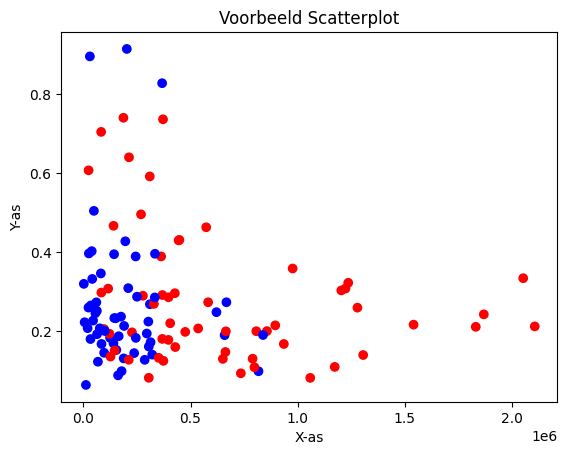

In [4]:
#print(data['label'])#,'PREDICT_original_sf_compactness_avg_2.5D','PREDICT_original_sf_compactness_std_2.5D'])
#df = pd.DataFrame(data, columns=["label", "PREDICT_original_sf_compactness_avg_2.5D","PREDICT_original_sf_compactness_std_2.5D"])
import matplotlib.pyplot as plt
colors = {'liposarcoma': 'red', 'lipoma': 'blue'}
#plt.scatter(data['PREDICT_original_sf_compactness_avg_2.5D'], data['PREDICT_original_sf_compactness_std_2.5D'], c=d['label'].map(colors))
plt.scatter(data['PREDICT_original_sf_volume_2.5D'], data['PREDICT_original_tf_Gabor_range_F0.05_A1.57'], c=data['label'].map(colors))

# Voeg labels toe aan de plot
plt.title('Voorbeeld Scatterplot')
plt.xlabel('X-as')
plt.ylabel('Y-as')

# Toon de plot
plt.show()

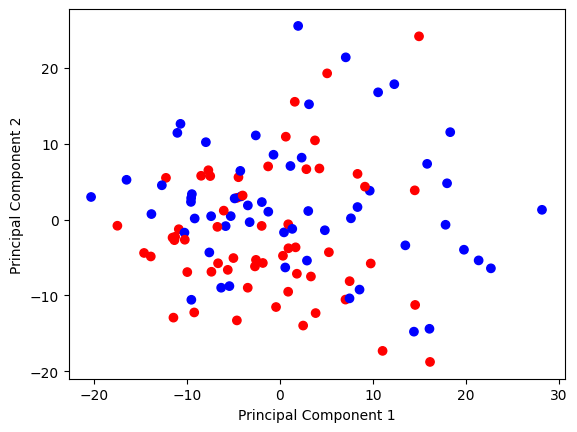

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# laad de gegevens
df = data.iloc[:, 2:]

# normaliseer de gegevens met behulp van StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# haal alle kolommen uit het DataFrame
kolommen = df.columns.tolist()

# pas de PCA toe op de genormaliseerde gegevens
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalized)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

# plot de resultaten
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=data['label'].map(colors))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [6]:
from scipy.stats import shapiro
df=data.iloc[:,2:]
niet_normaal = 0
for column in df:
    for label in set(data['label']):
        a_values = data.loc[data['label'] == label, column]
        stat, p = shapiro(a_values)
        # interpreteer de uitvoer van de test
        alpha = 0.05
        if p > alpha:
            #print(f'De gegevens lijken normaal verdeeld (fail to reject H0):{column}{label}')
            continue
        else:
            #print(f'De gegevens lijken niet normaal verdeeld (reject H0):{column}{label}')
            niet_normaal+=1


print(niet_normaal)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


783


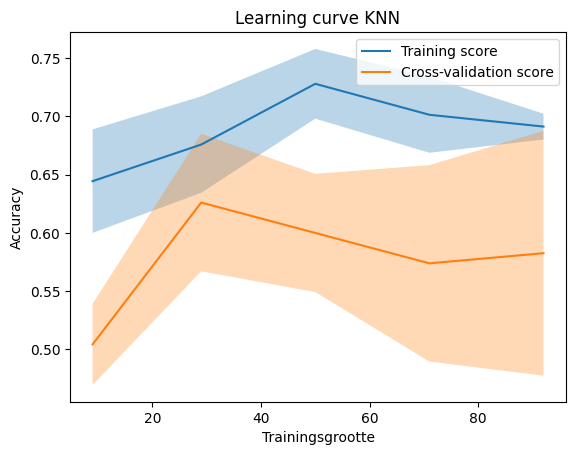

Accuracy KNN over de loops [0.43478260869565216, 0.6956521739130435, 0.5652173913043478, 0.4782608695652174, 0.6521739130434783]
F1-score KNN over de loops [0.48, 0.7199999999999999, 0.5833333333333334, 0.5384615384615384, 0.6363636363636364]


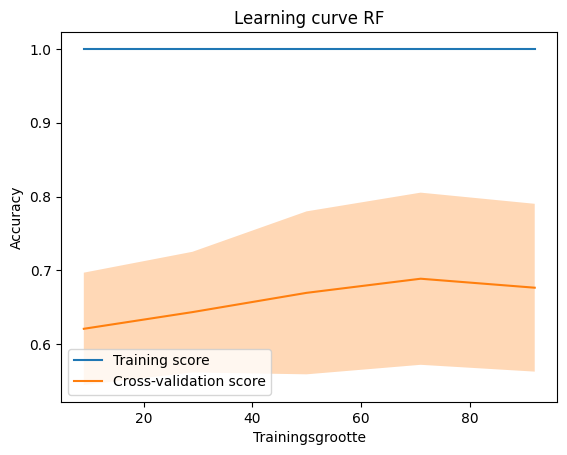

Accuracy RF over de loops [0.6956521739130435, 0.7391304347826086, 0.5652173913043478, 0.7391304347826086, 0.6521739130434783]
F1-score RF over de loops [0.631578947368421, 0.7692307692307693, 0.5454545454545455, 0.7272727272727274, 0.5555555555555556]


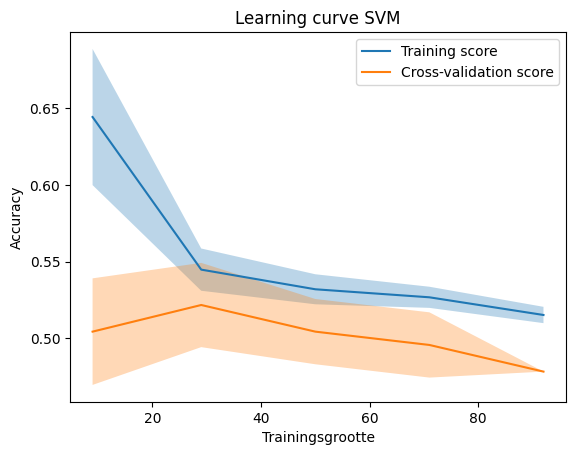

Accuracy SVM over de loops [0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.391304347826087]
F1-score SVM over de loops [0.6060606060606061, 0.0, 0.0, 0.0, 0.5625]


In [7]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

KNN_acc = []
KNN_f1 = []
KNN_train_mean = []
KNN_train_std= []
KNN_test_mean= []
KNN_test_std= []
RF_acc =[]
RF_f1 = []
RF_train_mean = []
RF_train_std= []
RF_test_mean= []
RF_test_std= []
SVM_acc =[]
SVM_f1 = []
SVM_train_mean = []
SVM_train_std= []
SVM_test_mean= []
SVM_test_std= []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']
    
    # Split de data in train en test sets voor de toekomst
    #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

    #KNN
    model = KNeighborsClassifier() # de default is 5 buren
    model.fit(X_train, label_train)
    # Maak een voorspelling met het model
    label_pred = model.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    KNN_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred,pos_label='liposarcoma')
    KNN_f1.append(f1)
    KNN_train_sizes,train_scores,test_scores = learning_curve(model,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    KNN_train_mean.append(train_mean)
    KNN_train_std.append(train_std)
    KNN_test_mean.append(test_mean)
    KNN_test_std.append(test_std)

    #Random forest
    model = RandomForestClassifier()
    model.fit(X_train, label_train)
    #L1 regularization
    lr_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.1)
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', lr_clf)])
    model.fit(X_train, label_train)
    pipe.fit(model.apply(X_train), label_train)
    label_pred = pipe.predict(model.apply(X_test))
    # Maak een voorspelling met het model
    #label_pred = model.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred,pos_label='liposarcoma')
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(model,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

    #SVM
    model = svm.SVC(kernel='poly')
    model.fit(X_train, label_train)
    # Maak een voorspelling met het model
    label_pred = model.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred,pos_label='liposarcoma')
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(model,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve KNN
KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

plt.figure()
plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
plt.title('Learning curve KNN')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

print(f'Accuracy KNN over de loops {KNN_acc}')
print(f'F1-score KNN over de loops {KNN_f1}')

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

print(f'Accuracy RF over de loops {RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')